In [1]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform, td_approximants
from pycbc.detector import Detector

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [3]:
print(td_approximants())

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidalv2', 'IMRPhenomXO4a', 'E

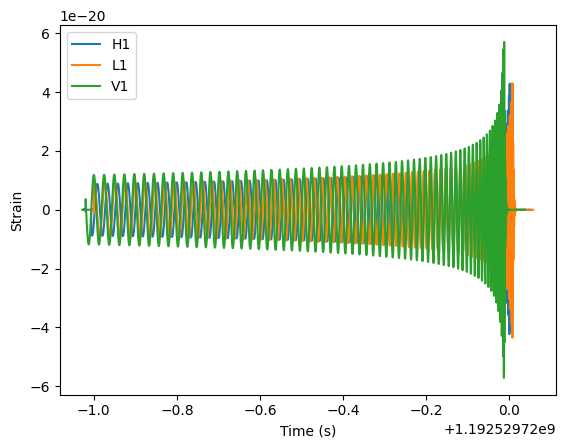

In [4]:
apx = "SEOBNRv4"
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(
    approximant=apx,
    mass1=10,
    mass2=10,
    spin1z=0.9,
    spin2z=0.4,
    inclination=1.23,
    coa_phase=2.45,
    delta_t=1.0 / 4096,
    f_lower=40,
)

det_h1 = Detector("H1")
det_l1 = Detector("L1")
det_v1 = Detector("V1")

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
#       Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc, right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc, right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc, right_ascension, declination, polarization)

pp.plot(signal_h1.sample_times, signal_h1, label="H1")
pp.plot(signal_l1.sample_times, signal_l1, label="L1")
pp.plot(signal_v1.sample_times, signal_v1, label="V1")


pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.legend()

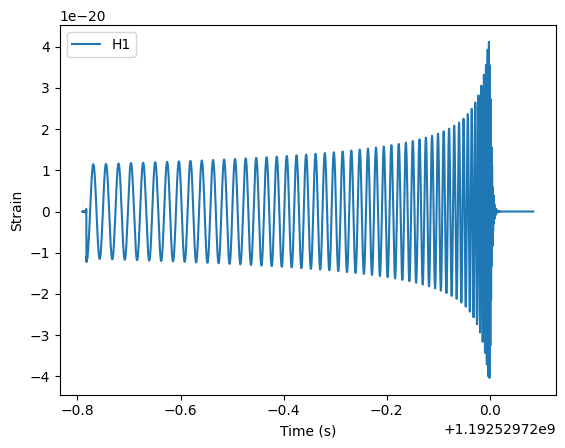

In [9]:
apx = "SEOBNRv4"
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(
    approximant=apx,
    mass1=26,
    mass2=6,
    spin1z=0.9,
    spin2z=0.4,
    inclination=1.23,
    coa_phase=2.45,
    delta_t=1.0 / 4096,
    f_lower=40,
)

det_h1 = Detector("H1")
det_l1 = Detector("L1")
det_v1 = Detector("V1")

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
#       Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc, right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc, right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc, right_ascension, declination, polarization)

pp.plot(signal_h1.sample_times, signal_h1, label="H1")
# pp.plot(signal_l1.sample_times, signal_l1, label="L1")
# pp.plot(signal_v1.sample_times, signal_v1, label="V1")

pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.legend()

In [6]:
print(dir(signal_h1))
print(dir(signal_l1))
print(dir(signal_v1))

['__abs__', '__add__', '__array__', '__array_ufunc__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__itruediv__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_checkother', '_copy', '_data', '_delta_t', '_epoch', '_getslice', '_getvalue', '_icheckother', '_memoize_single', '_return', '_returnarray', '_returntype', '_saved', '_scheme', '_swighelper', '_typecheck', '_vcheckother', '_vrcheckother', 'abs_arg_max', 'abs_max_loc', 'add_into', 'almost_equal_elem', 'almost_equal_norm', 'append_zeros', 'astype', 'at_time', 

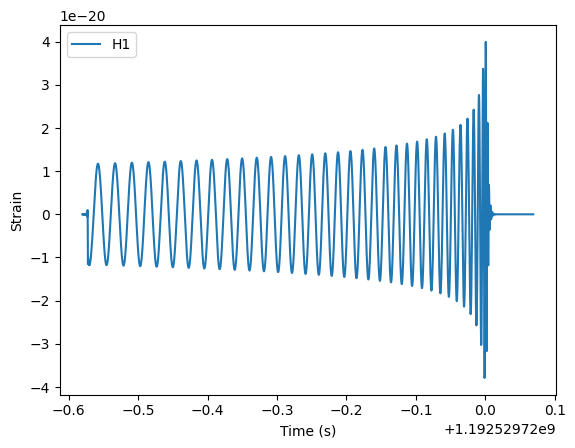

In [8]:
hp, hc = get_td_waveform(
    approximant=apx, # ??
    mass1=26, 
    mass2=6,
    inclination=1.23,
    coa_phase=2.45,
    delta_t=1.0 / 4096,
    f_lower=40,
)

det_h1 = Detector("H1")

end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc, right_ascension, declination, polarization)
pp.plot(signal_h1.sample_times, signal_h1, label="H1")

pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.legend()

In [21]:
import random

# Define the two values to choose from
value1 = "A"
value2 = "B"

# Initialize counters for each value
count_value1 = 0
count_value2 = 0

# Number of iterations
iterations = 400

# Loop for the specified number of iterations
for _ in range(iterations):
    # Generate a random number between 0 and 1
    random_number = random.random()

    # Assign value1 if random_number is less than 0.5, otherwise assign value2
    if random_number < 0.5:
        chosen_value = value1
        count_value1 += 1
    else:
        chosen_value = value2
        count_value2 += 1

    # Print the chosen value for each iteration
    print(chosen_value)

# Print the counts for each value
print("Count of value1 (A):", count_value1)
print("Count of value2 (B):", count_value2)

B
A
B
B
B
B
B
A
A
B
B
A
A
A
B
A
A
A
A
A
B
A
B
B
B
A
B
A
B
B
A
B
A
B
A
B
A
B
B
A
A
B
A
B
B
B
A
A
B
A
B
B
A
B
A
B
A
A
A
A
A
A
A
A
B
A
A
A
A
A
B
A
B
B
A
A
B
A
B
B
B
A
B
A
B
A
B
A
B
B
A
A
A
B
B
A
A
B
B
B
B
A
A
B
A
A
B
A
A
B
B
A
A
B
B
A
A
B
A
B
A
B
A
B
B
B
B
B
B
A
A
A
A
B
A
A
A
B
B
B
A
B
A
B
A
B
A
B
B
B
B
A
A
B
A
A
B
A
B
B
A
B
A
B
A
A
A
B
B
B
B
A
B
A
A
B
B
A
B
A
B
A
A
A
A
B
A
B
B
B
B
A
A
A
A
B
A
B
B
B
A
A
A
B
A
A
B
A
B
A
B
A
A
B
B
A
A
B
A
B
A
B
B
A
B
B
A
B
A
B
A
A
A
B
A
B
A
A
B
B
A
A
A
B
B
B
B
B
B
A
A
A
B
A
A
B
A
A
B
B
B
B
B
B
B
B
B
B
B
A
A
B
A
B
A
B
A
B
B
B
B
B
A
B
B
B
B
A
A
A
B
B
A
B
B
B
B
A
A
A
B
A
A
A
B
A
B
B
A
A
A
B
A
B
B
A
A
B
A
A
A
B
A
A
A
A
B
B
A
A
B
B
B
B
A
B
A
A
B
B
B
B
B
B
A
B
B
A
B
B
B
A
A
B
B
A
A
B
B
B
B
A
B
A
B
A
A
B
B
A
B
A
A
A
B
B
B
A
B
B
A
A
B
A
A
A
A
A
A
A
B
A
A
B
A
A
A
A
B
B
Count of value1 (A): 198
Count of value2 (B): 202
